<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Модели классификации**

**Выполнила:** Смирнова П.М.

**Группа:** БИВТ-22-СП-4

**Цель работы**

Познакомиться с основными приемами работы с моделями классификации в scikit-learn.

**Задания для выполнения**

1. Загрузите данные о диагностике сахарного диабета.
2. Постройте модель классификации для предсказания наличия заболевания.
3. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

Импорт нужных библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

Сперва загрузим исходный набор данных. Это можно сделать, как скопировав файл csv в локальную папку, так и по общедоступному URL

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


В первую очередь проверим данные на наличие пропущенных значений

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводим основную статистику по датасету

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Теперь выделим целевую переменную и факторы

In [ ]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [ ]:
y.shape, X.shape

((768,), (768, 8))

Для начала импортируем нужный класс и создадим его экземпляр

In [ ]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

Выведем коэффициенты модели

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.22481312e-01  3.51085717e-02 -1.33007000e-02  7.81917450e-04
 -1.17386223e-03  8.96453133e-02  8.68084149e-01  1.49863097e-02]


В линейных моделях коэффициенты имеют физический смысл - они показывают значимость соответствующих признаков. Поэтому представляет особый интерес посмотреть коэффициенты вместе с названиями признаков.

Для этого соединим массив названий колонок из датасета и массив коэффициентов. Можно использовать, например, генераторное выражение для прохода по получившемуся массиву. Конструкция "_ = [ ... ]" нужна только в ноутбуке для того, чтобы подавить автоматический вывод выражения

In [ ]:
_ = [print(k, f"{v:.3f}") for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.122
Glucose 0.035
BloodPressure -0.013
SkinThickness 0.001
Insulin -0.001
BMI 0.090
DiabetesPedigreeFunction 0.868
Age 0.015


Как и в модели линейной регрессии, данный вектор не включает в себя свободный коэффициент. Он хранится в отдельном поле класса

In [ ]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36470855]


Теперь можно построить по полученной модели прогноз. Для этого передадим в соответствующий метод нашу матрицу признаков

In [ ]:
y_pred = logistic.predict(X)

Сформировав вектор предсказанных значений целевой переменной можно сравнить его с реальными значениями

In [ ]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


Лучше использовать специальные функции - метрики. Самая простая из них подсчитывает количество правильно и неправильно распознанных объектов и представляет результат в виде матрицы классификации

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

Матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо

Гораздо удобнее анализировать ту же информацию в графической форме. Для этого воспользуемся специальной библиотекой seaborn, которая позволяет создавать полезные для машинного обучения визуализации очень просто

<Axes: >

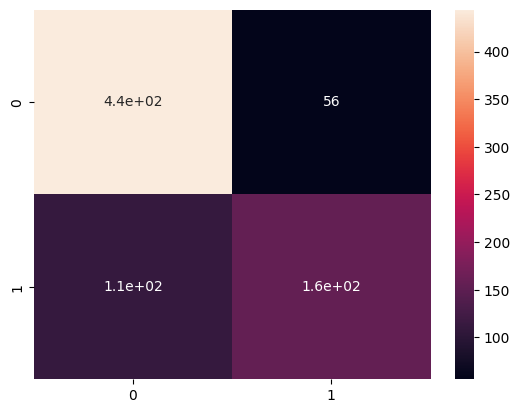

In [ ]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Кроме матрицы классификации весьма полезно использовать численные метрики эффективности классификации. Самая простая и распространенная из них - метрика точности предсказания - показывает долю правильно распознанных объектов. Расчет этой метрики встроен в сам объект модели и доступен с помощью специального метода

In [ ]:
logistic.score(X, y)

0.78125

Эту же метрику можно рассчитать и по-другому - через отдельную функцию из пакета metrics. Обратите внимание на другую сигнатуру метода

In [ ]:
metrics.accuracy_score(y, y_pred)

0.78125

**Вывод:** значение метрики (0,78) показывает, что модель в среднем делает ошибки в 22% процентов случаев. Это основной показатель качества модели.

**Другой вариант**

Здесь мы указываем, что будем создавать полиномиальные признаки второго порядка. Теперь можно использовать этот объект для создания собственно самих признаков

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [ ]:
polynomial = LogisticRegression(max_iter=10000)
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
polynomial.score(poly, y)

0.79296875

**Вывод:** модель не обучается до конца и это означает, что дополнительные признаки не помогют.

# **Задания для самостоятельной работы**

1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
Метод опорных векторов
Без ядра
С линейным ядром
С гауссовым ядром
С полиномиальным ядром
Метод ближайших соседей
Многослойный перцептрон
Дерево решений
Наивный байесовский классификатор
(*) Другие методы:
Пассивно-агрессивный классификатор
Гребневый классификатор
Случайный лес
Беггинг
Другие модели по желанию
3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

1. Изучение документации LogisticRegression и изменение аргументов модели

In [ ]:
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logistic_l1.fit(X, y)
print("Accuracy with L1 penalty:", logistic_l1.score(X, y))

Accuracy with L1 penalty: 0.7799479166666666


2. Применение других моделей классификации

In [ ]:
from sklearn.svm import SVC

# Без ядра
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("SVM Linear Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))

# С гауссовым ядром
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X, y)
y_pred_svm_rbf = svm_rbf.predict(X)
print("SVM RBF Accuracy:", metrics.accuracy_score(y, y_pred_svm_rbf))

# С полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X, y)
y_pred_svm_poly = svm_poly.predict(X)
print("SVM Poly Accuracy:", metrics.accuracy_score(y, y_pred_svm_poly))

SVM Linear Accuracy: 0.77734375
SVM RBF Accuracy: 0.7682291666666666
SVM Poly Accuracy: 0.7760416666666666


Метод ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_knn = knn.predict(X)
print("KNN Accuracy:", metrics.accuracy_score(y, y_pred_knn))

KNN Accuracy: 0.8033854166666666


Многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)
mlp.fit(X, y)
y_pred_mlp = mlp.predict(X)
print("MLP Accuracy:", metrics.accuracy_score(y, y_pred_mlp))

MLP Accuracy: 0.7721354166666666


Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)
y_pred_dt = dt.predict(X)
print("Decision Tree Accuracy:", metrics.accuracy_score(y, y_pred_dt))

Decision Tree Accuracy: 1.0


Наивный байесовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X, y)
y_pred_nb = nb.predict(X)
print("Naive Bayes Accuracy:", metrics.accuracy_score(y, y_pred_nb))

Naive Bayes Accuracy: 0.7630208333333334


3. Функция для автоматического обучения всех моделей

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics

def train_and_evaluate_models(X, y):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM Linear": SVC(kernel='linear'),
        "SVM RBF": SVC(kernel='rbf'),
        "SVM Poly": SVC(kernel='poly', degree=3),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "MLP": MLPClassifier(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB(),
        "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000),
        "Ridge": RidgeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
    }

    for name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = metrics.accuracy_score(y, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")

import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

train_and_evaluate_models(X, y)

Logistic Regression Accuracy: 0.7812
SVM Linear Accuracy: 0.7773
SVM RBF Accuracy: 0.7682
SVM Poly Accuracy: 0.7760
KNN Accuracy: 0.8034
MLP Accuracy: 0.7396
Decision Tree Accuracy: 1.0000
Naive Bayes Accuracy: 0.7630
Passive Aggressive Accuracy: 0.4193
Ridge Accuracy: 0.7826
Random Forest Accuracy: 1.0000
Bagging Accuracy: 0.9805


5. Вывод матрицы классификации и оценки точности для каждой модели

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

def train_and_evaluate_models_with_details(X, y):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM Linear": SVC(kernel='linear'),
        "SVM RBF": SVC(kernel='rbf'),
        "SVM Poly": SVC(kernel='poly', degree=3),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "MLP": MLPClassifier(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB(),
        "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000),
        "Ridge": RidgeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
    }

    for name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = metrics.accuracy_score(y, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y, y_pred))
        print("Classification Report:")
        print(classification_report(y, y_pred))
        print("-" * 60)

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

train_and_evaluate_models_with_details(X, y)

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

train_and_evaluate_models_with_details(X_iris, y_iris)

Logistic Regression Accuracy: 0.7812
Confusion Matrix:
[[444  56]
 [112 156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768

------------------------------------------------------------
SVM Linear Accuracy: 0.7773
Confusion Matrix:
[[443  57]
 [114 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.73      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768

------------------------------------------------------------
SVM RBF Accuracy: 0.7682
Confus